###  数据可视化工具学习——seaborn

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #一旦导入了seaborn，matplotlib的默认作图风格就会被覆盖成seaborn的格式
%matplotlib inline 
#在jupyter notebook里作图，需要用到这个命令

#### 读取原始数据（这是一份红酒成分与口感评分数据）

In [86]:
winedata=pd.read_csv('winequality-red.csv')
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


#### **直方图**——seaborn.distplot()
如对上面的quality列做直方图，保留概率密度曲线

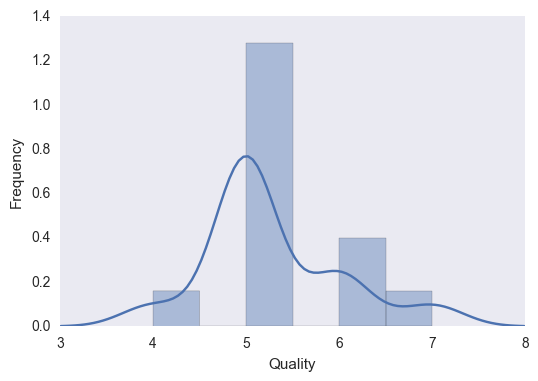

In [87]:
sns.distplot(winedata['quality'])   # 不需要概率密度曲线直接将 kde=False 即可
sns.set_style('dark')    #设置背景色
sns.utils.axlabel('Quality', 'Frequency') #设置X,Y坐标名
sns.plt.show()

#### 折线图

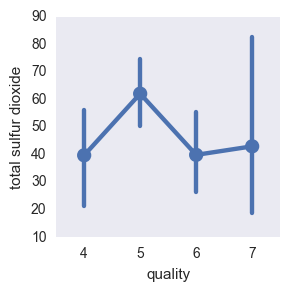

In [88]:
sns.factorplot(data=winedata, x='quality', y='total sulfur dioxide',size=3)
sns.plt.show()

#### 柱状图——seaborn.barplot()

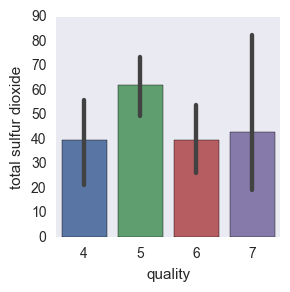

In [122]:
sns.factorplot(data=winedata, x='quality', y='total sulfur dioxide',kind='bar',size=3)
#ax = sns.barplot(data=winedata, x='quality', y='total sulfur dioxide',ci=0)
sns.plt.show()

#### 散点图——seaborn.stripplot()

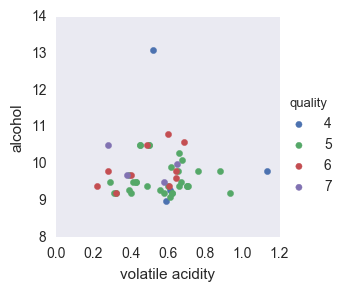

In [96]:
temp=sns.FacetGrid(winedata, hue='quality', size=3)   #hue参数设置区分色彩列
temp.map(plt.scatter, 'volatile acidity', 'alcohol')
temp.add_legend()
sns.plt.show()
#ax = sns.stripplot(x='quality', y='alcohol', data=winedata) #普通散点图
#ax = sns.stripplot(x='quality', y='alcohol', data=winedata, jitter=True) #带抖动的散点图
#sns.plt.show()

#### 箱型图——seaborn.boxplot()
以quality为X轴，alcohol为Y轴，做出箱线图，可以看出异常值

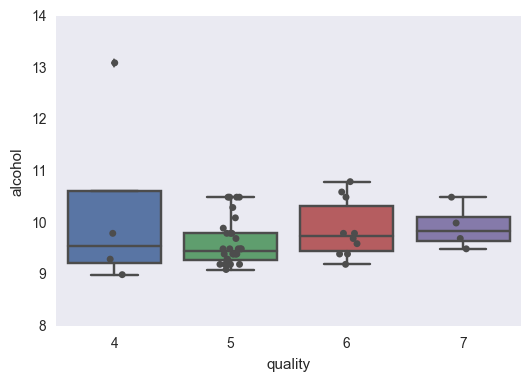

In [116]:
ax=sns.boxplot(x='quality', y='alcohol', data=winedata)
ax=sns.stripplot(x='quality', y='alcohol', data=winedata, jitter=True, color='.3')  #加上点，jitter=True 使各个散点分开，要不然会是一条直线
sns.plt.show()

#### 小提琴图——seaborn.violinplot()
可以看出密度分布

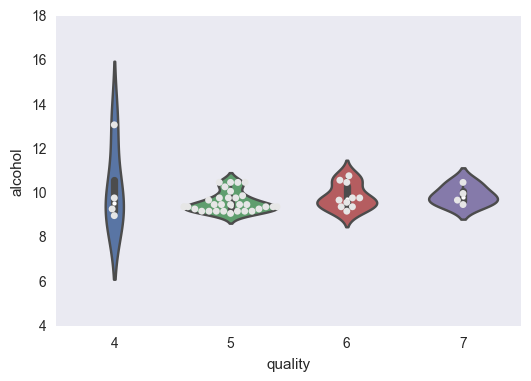

In [119]:
ax = sns.violinplot(x='quality', y='alcohol', data=winedata, size=5)
ax = sns.swarmplot(x='quality', y='alcohol', data=winedata,color='.9')
sns.plt.show()

#### 多变量作图——seaborn.pairplot()
seaborn可以一次性两两组合多个变量做出多个对比图，有n个变量，就会做出一个n × n个格子的图，相同的两个变量之间以直方图展示，不同的变量则以散点图展示，**要注意的是数据中不能有NaN（缺失的数据），否则会报错。**

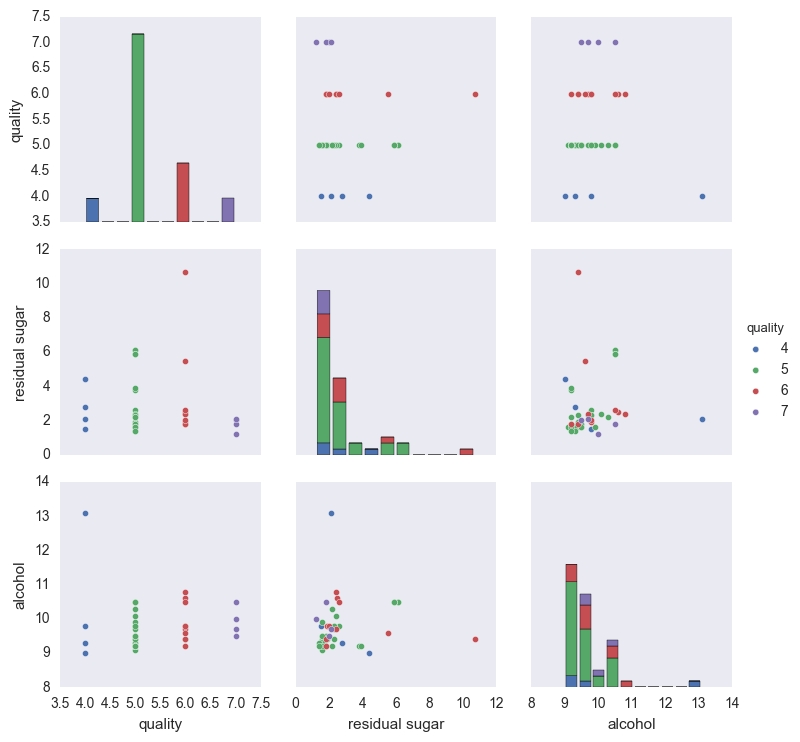

In [93]:
sns.pairplot(winedata, vars=['quality', 'residual sugar','alcohol'],hue='quality')
sns.plt.show()

#### 回归图——seaborn.lmplot()、seaborn.regplot()

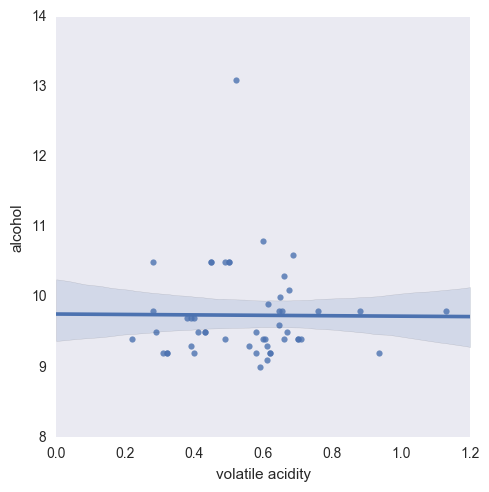

In [124]:
sns.lmplot(x='volatile acidity', y='alcohol', data=winedata)   # hue参数进行分组拟合，markers=['o', 'x']，col参数不同组的子图
sns.plt.show()

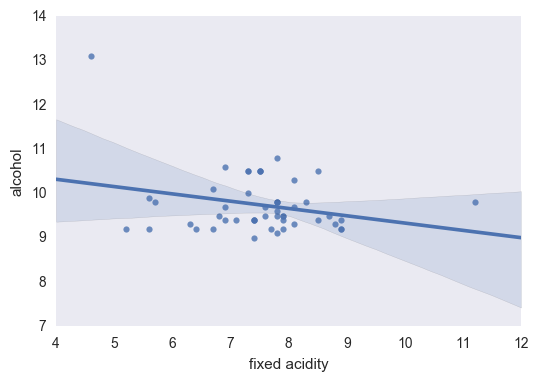

In [128]:
sns.regplot(x='fixed acidity', y='alcohol', data=winedata)
sns.plt.show()